In [51]:
import duckdb
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from obsq.utils.core import convert_df_to_gdf
path = "/home/etienne/projects/obsq/work/dev/data/data.duckdb"


In [52]:
table = 'spatial_match'

schema = 'score'
con = duckdb.connect(path)
df = con.execute(f"""SELECT* FROM {schema}.{table}""" ).df()
#df = df.drop(columns= 'geom')
con.close()

In [53]:
df.columns

Index(['gbifID', 'dist', 'spatial_score'], dtype='object')

In [54]:
x = 'inat_id_log_z_score'
y = '' 

In [55]:
df

,gbifID,dist,spatial_score
0,5153342881,18573.184190,0.0
1,5153806253,1480.317802,0.0
2,4902066439,6110.246495,0.0
3,4852740230,9015.704896,0.0
4,5153568881,4263.732468,0.0
...,...,...,...
39106,5153605147,8194.423063,0.0
39107,4176916963,9347.169255,0.0
39108,5133466020,11164.211629,0.0
39109,4855319305,32955.146602,0.0


In [57]:
df.describe()

,gbifID,dist,spatial_score
count,3.911100e+04,39111.000000,39111.000000
mean,4.635206e+09,13852.822871,0.000606
std,7.719233e+08,8603.956104,0.020926
min,3.079586e+09,1.805136,0.000000
25%,4.046325e+09,7342.816131,0.000000
50%,4.901815e+09,12538.218025,0.000000
75%,5.168002e+09,19642.836131,0.000000
max,5.897887e+09,41047.443668,0.983656


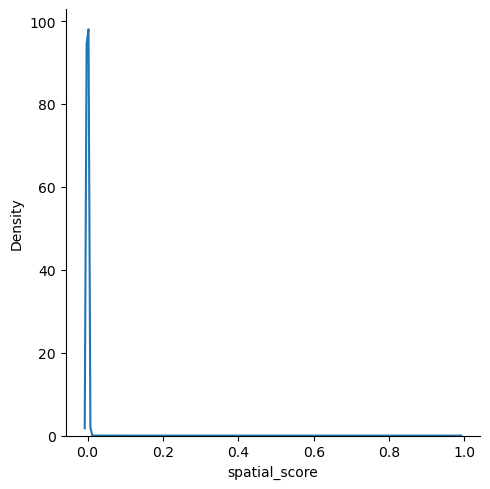

In [60]:
sns.displot(df, x= 'spatial_score', kind='kde')